In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9615,9616,15664860,Chao,692,Spain,Female,47,3,0.00,2,1,0,150802.41,1
9787,9788,15752626,Genovese,553,France,Male,32,7,64082.09,1,0,1,109159.58,0
4364,4365,15727408,Koo,523,Germany,Male,27,8,61688.61,2,1,0,147059.16,0
470,471,15759298,Shih,631,Spain,Male,27,10,134169.62,1,1,1,176730.02,0
72,73,15812518,Palermo,657,Spain,Female,37,0,163607.18,1,0,1,44203.55,0


In [3]:
data. columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#### Some Data Cleaning tasks to make sure the data is ready 

In [4]:
data.drop(['RowNumber', 'CustomerId', 'Surname'],axis='columns',inplace=True)

In [5]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
data['Gender'].replace({'Male':1 , 'Female':0},inplace=True)

In [7]:
data.Gender.unique()

array([0, 1], dtype=int64)

In [8]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [9]:

data[data.Exited==0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,1,28,7,155060.41,1,1,0,29179.52,0
9994,800,France,0,29,2,0.00,2,0,0,167773.55,0
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0


##### Visualizations to further understand how the churn trend is shifting based on multiple parameters

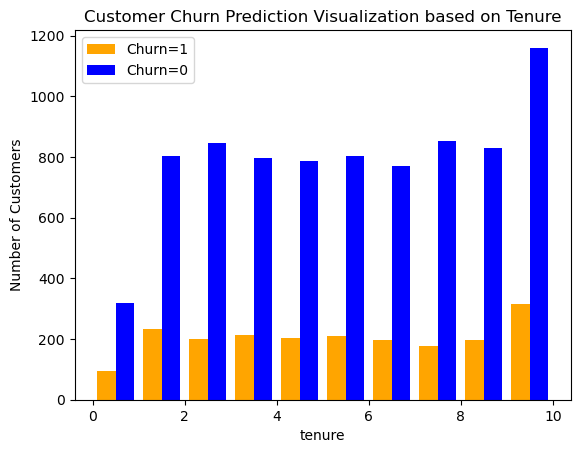

In [10]:
exited_no = data[data.Exited==0].Tenure
exited_yes=data[data.Exited==1].Tenure
plt.title('Customer Churn Prediction Visualization based on Tenure')
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.hist([exited_yes,exited_no],color=['orange','blue'],label=['Churn=1','Churn=0'])
plt.legend()

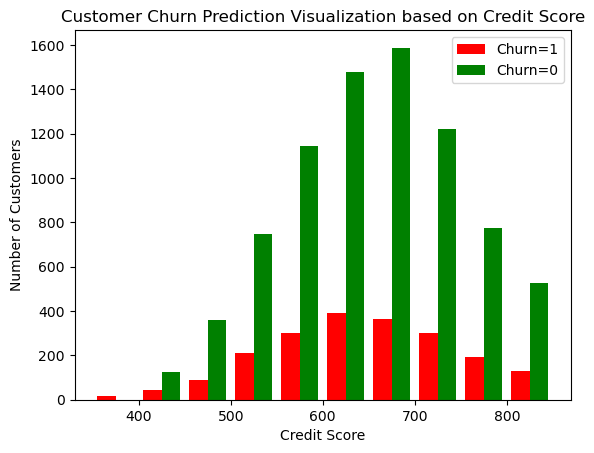

In [11]:
exited_no = data[data.Exited==0].CreditScore
exited_yes=data[data.Exited==1].CreditScore
plt.title('Customer Churn Prediction Visualization based on Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.hist([exited_yes,exited_no],color=['red','green'],label=['Churn=1','Churn=0'])
plt.legend()

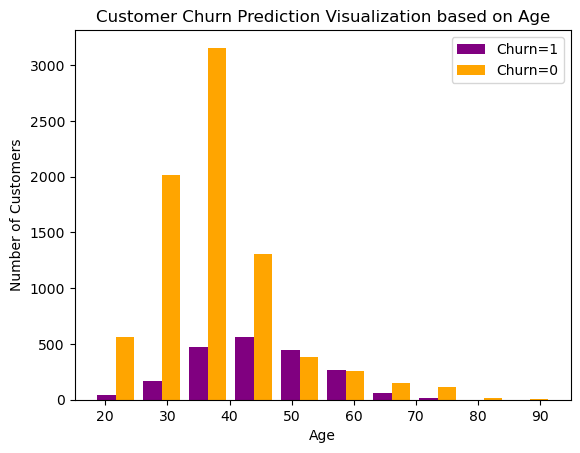

In [12]:
exited_no = data[data.Exited==0].Age
exited_yes=data[data.Exited==1].Age
plt.title('Customer Churn Prediction Visualization based on Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.hist([exited_yes,exited_no],color=['purple','orange'],label=['Churn=1','Churn=0'])
plt.legend()

##### Spliting a columns into multiple seperate parts for the ANN model to predict well. One Hot Encoding

In [13]:
data1= pd.get_dummies(data,'Geography')


In [14]:
data1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9074,608,0,41,5,0.00,2,1,1,72462.25,0,True,False,False
2747,577,0,35,10,0.00,2,1,1,25161.61,0,True,False,False
4746,757,1,32,9,0.00,2,1,0,115950.96,0,True,False,False
4062,559,1,45,8,24043.45,1,0,1,169781.45,1,True,False,False
6830,765,1,43,9,157960.49,2,0,0,136602.80,0,True,False,False


##### The Extra hows has changed to boolean values. W e need to change it to integer values so that it can be used in the model

In [15]:
data1.replace({False: 0, True: 1}, inplace=True)

In [16]:
data1.columns.unique()

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

#### Scaling some columns to work with the model

In [17]:
cols_to_scale = ['Balance','Tenure','EstimatedSalary','CreditScore','Age','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1[cols_to_scale] = scaler.fit_transform(data1[cols_to_scale])

In [18]:
data1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5310,0.544,1,0.324324,0.9,0.461407,0.000000,0,0,0.360756,1,0,1,0
2205,0.318,1,0.270270,0.2,0.000000,0.000000,0,0,0.842323,0,0,0,1
9653,0.354,1,0.540541,0.3,0.547308,0.000000,1,1,0.630727,0,0,1,0
9370,0.422,1,0.337838,0.4,0.000000,1.000000,0,0,0.092565,1,1,0,0
9605,0.772,0,0.148649,0.9,0.000000,0.333333,0,0,0.880790,0,1,0,0


In [19]:
for col in data1:
    print(f'{col}: {data1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

##### Spliting the model into train and test

In [20]:
x = data1.drop('Exited',axis='columns')
y = data1['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [21]:
x_train.shape

(8000, 12)

In [22]:
x_test.shape

(2000, 12)

In [23]:
x_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,0,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,1,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,0,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,0,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,1,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,0,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,0,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,0,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,1,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,1,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [24]:
len(x_train.columns)

12

##### Building the ANN model 

In [25]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [30]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(12, input_dim=12, activation='relu'),
        keras.layers.Dense(6, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(x_train, y_train, epochs=100)
    else:
        model.fit(x_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(x_test, y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [28]:
def ANN(x_train, y_train, x_test, y_test):
    model=keras.Sequential([
    # The input_shape is the first layer, and the rest is hidden layer
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    #this one is also another hidden layer. No need of input shape becaues it is already given 
    keras.layers.Dense(6,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    #this is the output layer. Because output layer the values are 0 and 1 we use sigmoid
    keras.layers.Dense(1,activation='sigmoid'),
    ])
    model.compile(optimizer='adam',
              #we use binary because we are dealing with 0 and 1
             loss='binary_crossentropy',
             metrics=['accuracy'])
    model.fit(x_train,y_train,epochs=200)
    model.evaluate(x_test, y_test)
    y_pred = model.predict(x_test)
    
    print("Classification Report: \n", classification_report(y_test, y_pred))
    
    return y_pred
    


In [29]:
y_pred = ANN(x_train, y_train, x_test, y_test)

Epoch 1/200
250/250 [==============================] - 2s 3ms/step - loss: 0.5385 - accuracy: 0.7906
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 0.4738 - accuracy: 0.7960
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 0.4618 - accuracy: 0.7960
Epoch 4/200
250/250 [==============================] - 1s 3ms/step - loss: 0.4522 - accuracy: 0.7960
Epoch 5/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4447 - accuracy: 0.7960
Epoch 6/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4387 - accuracy: 0.7960
Epoch 7/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4334 - accuracy: 0.7960
Epoch 8/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4307 - accuracy: 0.8048
Epoch 9/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4277 - accuracy: 0.8127
Epoch 10/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4256 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8626
Epoch 82/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8629
Epoch 83/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8624
Epoch 84/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3356 - accuracy: 0.8633
Epoch 85/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3365 - accuracy: 0.8641
Epoch 86/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8622
Epoch 87/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3350 - accuracy: 0.8629
Epoch 88/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8625
Epoch 89/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3358 - accuracy: 0.8630
Epoch 90/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 

250/250 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8648
Epoch 161/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.8649
Epoch 162/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3318 - accuracy: 0.8639
Epoch 163/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3311 - accuracy: 0.8641
Epoch 164/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.8649
Epoch 165/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8643
Epoch 166/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.8646
Epoch 167/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8659
Epoch 168/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8655
Epoch 169/200
250/250 [==============================] - 1s 2ms/step - loss: 0.3311 - a

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [31]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5372 - accuracy: 0.7460
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4744 - accuracy: 0.7961
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4594 - accuracy: 0.8014
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4442 - accuracy: 0.8125
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4312 - accuracy: 0.8202
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4218 - accuracy: 0.8230
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4153 - accuracy: 0.8257
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4100 - accuracy: 0.8286
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8298
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3994 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.3402 - accuracy: 0.8591
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3402 - accuracy: 0.8611
Epoch 83/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8590
Epoch 84/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3399 - accuracy: 0.8594
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3409 - accuracy: 0.8584
Epoch 86/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8583
Epoch 87/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8590
Epoch 88/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8593
Epoch 89/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8590
Epoch 90/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 

In [32]:
y_test.value_countsts()

Exited
0    1595
1     405
Name: count, dtype: int64

In [33]:
count_class_0,count_class_1 = data.Exited.value_counts()
#divide by class
df_class_0 = data1[data1['Exited']==0]
df_class_1 = data1[data1['Exited']==1]

In [34]:
df_class_0.shape

(7963, 13)

In [35]:
df_class_1.shape

(2037, 13)

In [36]:
df_class_0.sample(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9137,0.370,0,0.270270,0.0,0.541731,0.0,1,0,0.402109,0,1,0,0
6280,0.282,1,0.108108,0.4,0.407541,0.0,1,1,0.729516,0,0,1,0


###### Method 1 : Undersampling

In [37]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)

print('Random undersampling')
print(df_test_under.Exited.value_counts())


Random undersampling
Exited
0    2037
1    2037
Name: count, dtype: int64


In [38]:
x = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']

In [39]:
from sklearn.model_selection import train_test_split
#'stratify' makes sure that both the samples are balanced (it will also have both classes in x_test,x_train so that different )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [40]:
y_train.value_counts()

Exited
1    1630
0    1629
Name: count, dtype: int64

In [41]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 2s 3ms/step - loss: 0.6944 - accuracy: 0.5382
Epoch 2/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.5993
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.6171
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6306
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.6441
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6249 - accuracy: 0.6622
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.6689
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.6744
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.6840
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5924 - accura

102/102 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.7794
Epoch 82/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.7782
Epoch 83/100
102/102 [==============================] - 0s 3ms/step - loss: 0.4566 - accuracy: 0.7824
Epoch 84/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7797
Epoch 85/100
102/102 [==============================] - 0s 3ms/step - loss: 0.4559 - accuracy: 0.7803
Epoch 86/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4554 - accuracy: 0.7831
Epoch 87/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7794
Epoch 88/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7785
Epoch 89/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7831
Epoch 90/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 

###### Method 2 : Oversampling

In [42]:
count_class_0,count_class_1


(7963, 2037)

###### The code duplicates random samples of class 1 and makes sure both the class has the same value count

In [44]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
print('Random Oversampliong')
print(df_test_over.Exited.value_counts())

Random Oversampliong
Exited
0    7963
1    7963
Name: count, dtype: int64


In [45]:
x = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [47]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [48]:
y_test.value_counts()

Exited
0    1593
1    1593
Name: count, dtype: int64

In [49]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 2s 3ms/step - loss: 0.6496 - accuracy: 0.6304
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6083 - accuracy: 0.6734
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5921 - accuracy: 0.6881
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5751 - accuracy: 0.7033
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5524 - accuracy: 0.7249
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5243 - accuracy: 0.7411
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5023 - accuracy: 0.7560
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4892 - accuracy: 0.7620
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4813 - accuracy: 0.7637
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4766 - accura

399/399 [==============================] - 1s 3ms/step - loss: 0.4418 - accuracy: 0.7853
Epoch 82/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4422 - accuracy: 0.7855
Epoch 83/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.7869
Epoch 84/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4417 - accuracy: 0.7863
Epoch 85/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.7882
Epoch 86/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4414 - accuracy: 0.7851
Epoch 87/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4409 - accuracy: 0.7863
Epoch 88/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.7850
Epoch 89/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.7862
Epoch 90/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 

###### Method 3 : SMOTE

###### Smote method uses te data to create synthetic data using K nearest neighbours algorithm

In [50]:
x=data1.drop('Exited',axis='columns')
y=data1['Exited']

In [51]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)


In [54]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [55]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 2s 3ms/step - loss: 0.6526 - accuracy: 0.6150
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6066 - accuracy: 0.6787
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5839 - accuracy: 0.6991
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5656 - accuracy: 0.7099
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5523 - accuracy: 0.7214
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5409 - accuracy: 0.7316
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5301 - accuracy: 0.7374
Epoch 8/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5210 - accuracy: 0.7444
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5126 - accuracy: 0.7489
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5055 - accura

399/399 [==============================] - 1s 2ms/step - loss: 0.4423 - accuracy: 0.7898
Epoch 82/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4423 - accuracy: 0.7889
Epoch 83/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4419 - accuracy: 0.7889
Epoch 84/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.7891
Epoch 85/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4424 - accuracy: 0.7886
Epoch 86/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4425 - accuracy: 0.7915
Epoch 87/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4423 - accuracy: 0.7906
Epoch 88/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4423 - accuracy: 0.7874
Epoch 89/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4415 - accuracy: 0.7913
Epoch 90/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4416 - accuracy: 

###### Method 4 : Use of Ensemble with undersampling

In [57]:
data1.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [59]:
x=data1.drop('Exited',axis='columns')
y=data1['Exited']

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)


In [61]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [62]:
6370/3

2123.3333333333335

In [63]:
df3 = x_train.copy()
df3['Exited']=y_train

In [65]:
df3_class0 = df3[df3.Exited == 0]
df3_class1 = df3[df3.Exited == 1]

In [66]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [69]:
#we are using a function here because we need to run 3 batches individually
def get_train_batch(df_majority, df_minority, start, end):
    #'majority' and 'minority' are classes 0 and 1. For each batch, we need to input the start and end values(ie the number of rows the model should take)
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    x_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return x_train, y_train    

##### Prediction of first batch

In [70]:
#here we have included the majority, minority, start and stop values
x_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 2123)

y_pred1 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
118/118 [==============================] - 2s 3ms/step - loss: 0.6893 - accuracy: 0.5302
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.6006
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.6704
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.6784
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6859
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.6845
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.6960
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.6984
Epoch 9/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.6957
Epoch 10/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5726 - accura

118/118 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7780
Epoch 82/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7751
Epoch 83/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7788
Epoch 84/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7783
Epoch 85/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.7764
Epoch 86/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7772
Epoch 87/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7807
Epoch 88/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7748
Epoch 89/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7746
Epoch 90/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 

###### Prediction of second batch

In [72]:
x_train, y_train = get_train_batch(df3_class0, df3_class1,2123,4246)

y_pred2= ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
118/118 [==============================] - 2s 2ms/step - loss: 0.6760 - accuracy: 0.5678
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.6323
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6536
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.6579
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.6784
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5985 - accuracy: 0.6882
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.6944
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.7050
Epoch 9/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7114
Epoch 10/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5524 - accura

118/118 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.7884
Epoch 82/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.7868
Epoch 83/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7860
Epoch 84/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.7879
Epoch 85/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.7890
Epoch 86/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.7876
Epoch 87/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.7863
Epoch 88/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.7879
Epoch 89/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.7863
Epoch 90/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 

###### Prediction of third batch

In [73]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 4246, 6370)

y_pred3 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
118/118 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.5189
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5685
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6292
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.6742
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.6926
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5845 - accuracy: 0.7048
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.7048
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.7048
Epoch 9/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.7171
Epoch 10/100
118/118 [==============================] - 0s 2ms/step - loss: 0.5539 - accura

118/118 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.7805
Epoch 82/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7821
Epoch 83/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.7853
Epoch 84/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7826
Epoch 85/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.7821
Epoch 86/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7797
Epoch 87/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.7848
Epoch 88/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.7760
Epoch 89/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.7802
Epoch 90/100
118/118 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 

##### Taking the majority vote of all the three predictions

##### The gneral idea of our ensemble method is when all 3 values are less than or equal 1 then the vote is 0. When all 3 values are greater than 1 then the vote is 1

In [74]:
vote1=0
vote2=0
vote3=1
#here the voted value is 0
vote1+vote2+vote3

1

In [75]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [76]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1593
           1       0.55      0.68      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.84      0.82      0.83      2000

